<a href="https://colab.research.google.com/github/jpantojaj/Actividades-Vision_Artificial/blob/main/Actividad_3_Segmentacion_JPJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Actividad 3**
### ***Alumno: Johnny Pantoja Jara***

####**1. Carga de Imagenes**

In [1]:
pip install opencv-python-headless matplotlib

In [18]:
imagenes=['frame_00_delay-0.5s.png','frame_01_delay-0.5s.png','frame_02_delay-0.5s.png','frame_03_delay-0.5s.png','frame_04_delay-0.5s.png',
          'frame_05_delay-0.5s.png','frame_06_delay-0.5s.png','frame_07_delay-0.5s.png','frame_08_delay-0.5s.png','frame_09_delay-0.5s.png',
          'frame_10_delay-0.5s.png','frame_11_delay-0.5s.png','frame_12_delay-0.5s.png','frame_13_delay-0.5s.png','frame_14_delay-0.5s.png',
          'frame_15_delay-0.5s.png','frame_16_delay-0.5s.png','frame_17_delay-0.5s.png','frame_18_delay-0.5s.png','frame_19_delay-1.1s.png']

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [168]:
def procesar_imagen(ruta, alpha, beta, kernel_size):
    # Carga la imagen en color
    imagen_rgb = cv2.cvtColor(cv2.imread(ruta), cv2.COLOR_BGR2RGB)

    # Carga la imagen en escala de grises
    image_gray = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)

    # Ajuste de intensidad y mejora de contraste
    image_adjusted = cv2.convertScaleAbs(imagen_rgb, alpha=alpha, beta=beta)

    # Binarización Otsu
    otsu_threshold, otsu_thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Operaciones Morfológicas
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    # Apertura (Erosión seguida de dilatación)
    opening = cv2.morphologyEx(otsu_thresh, cv2.MORPH_OPEN, kernel)
    # Cierre (Dilatación seguida de erosión)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    # Dilatación
    dilation = cv2.dilate(closing, kernel, iterations=1)
    # Erosión
    erosion = cv2.erode(dilation, kernel, iterations=1)
    refined_image = erosion

    # Aplica un umbral y calcula el área segmentada
    _, binary_image = cv2.threshold(refined_image, otsu_threshold, 255, cv2.THRESH_BINARY)
    segmented_area = np.sum(binary_image == 255)

    # Comparativa entre imagen original y sus diferentes tratamientos
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 4, 1)
    plt.title("Original", fontsize=8)
    plt.imshow(imagen_rgb)
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.title('Brillo/Contraste', fontsize=8)
    plt.imshow(image_adjusted)
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.title('Otsu', fontsize=8)
    plt.imshow(otsu_thresh, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.title('Refinada', fontsize=8)
    plt.imshow(refined_image, cmap='gray')
    plt.axis('off')

    plt.show()

    return segmented_area, otsu_threshold

In [169]:
# Bateria de Parámetros
alpha=1.5  #Factor de ganancia (contraste)
beta=50    #Valor de brillo adicional
kernel_size=1 #Tamaño del kernel para las operaciones morfológicas

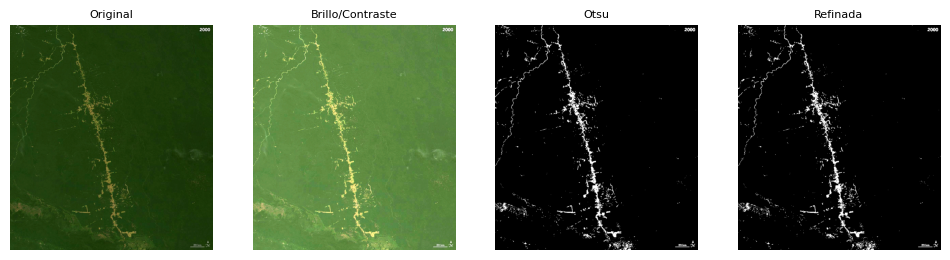

Imagen 0
Área segmentada: 16390 píxeles cuadrados
Área segmentada: 6427.450980392157 Km2
Umbral Otsu: 75.0


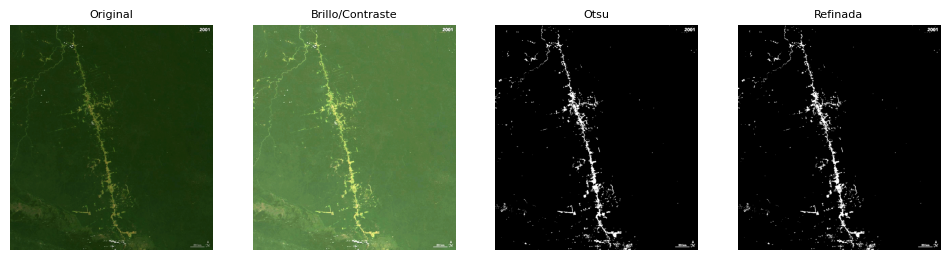

Imagen 1
Área segmentada: 13865 píxeles cuadrados
Área segmentada: 5437.254901960785 Km2
Umbral Otsu: 69.0


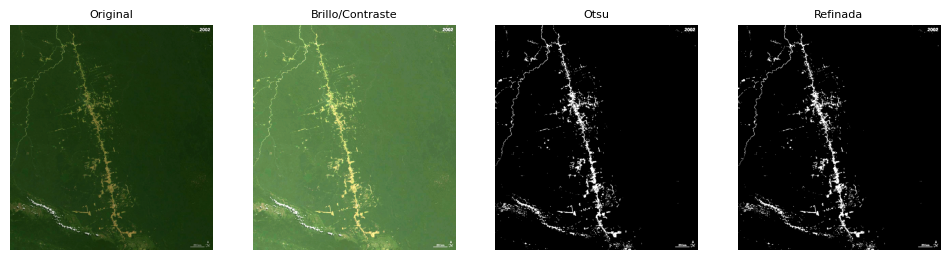

Imagen 2
Área segmentada: 18927 píxeles cuadrados
Área segmentada: 7422.35294117647 Km2
Umbral Otsu: 75.0


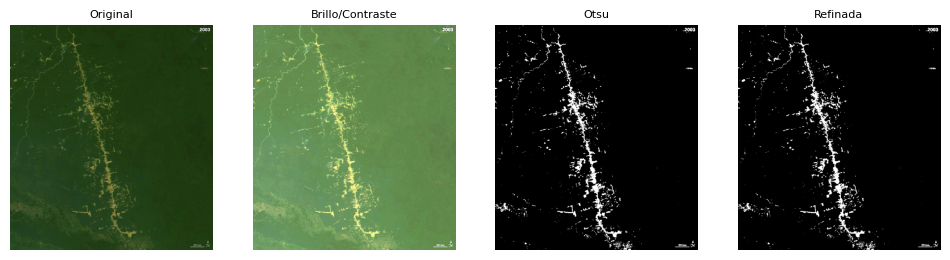

Imagen 3
Área segmentada: 20481 píxeles cuadrados
Área segmentada: 8031.764705882352 Km2
Umbral Otsu: 74.0


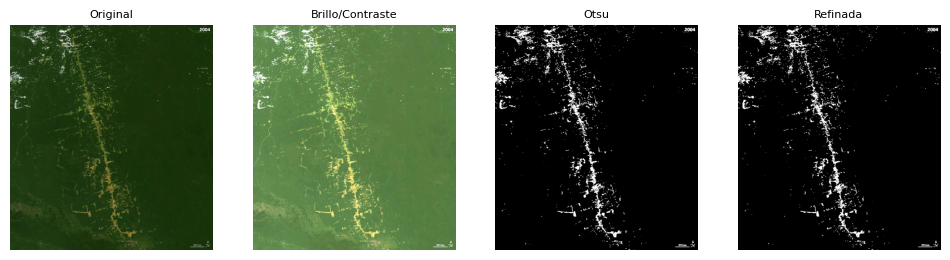

Imagen 4
Área segmentada: 22584 píxeles cuadrados
Área segmentada: 8856.470588235294 Km2
Umbral Otsu: 79.0


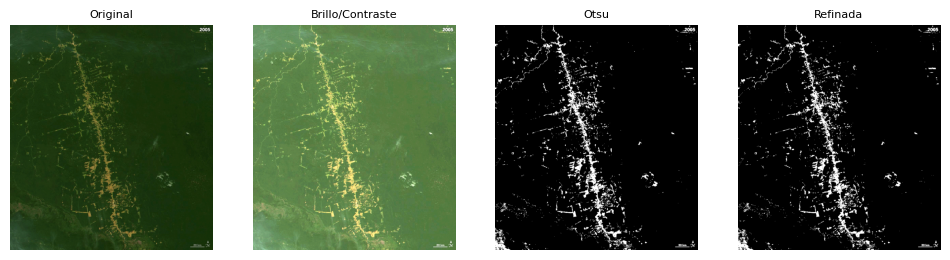

Imagen 5
Área segmentada: 30303 píxeles cuadrados
Área segmentada: 11883.529411764704 Km2
Umbral Otsu: 68.0


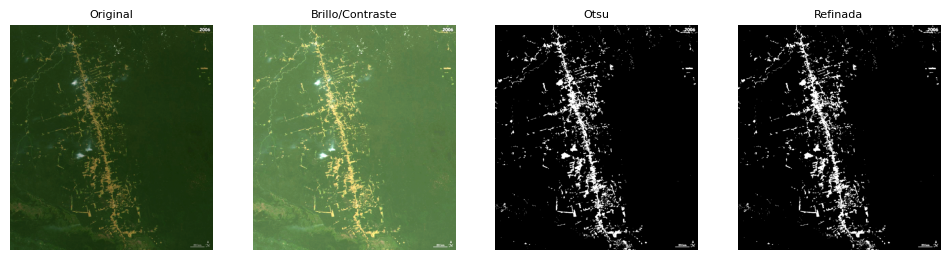

Imagen 6
Área segmentada: 33330 píxeles cuadrados
Área segmentada: 13070.588235294117 Km2
Umbral Otsu: 70.0


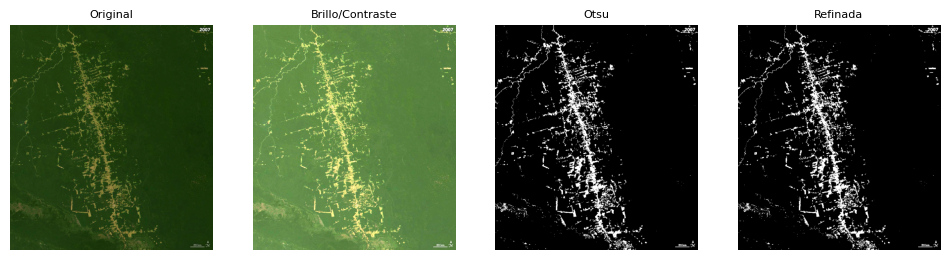

Imagen 7
Área segmentada: 39008 píxeles cuadrados
Área segmentada: 15297.254901960785 Km2
Umbral Otsu: 74.0


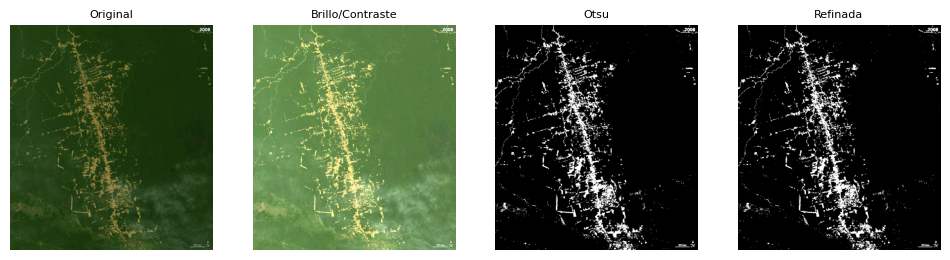

Imagen 8
Área segmentada: 42928 píxeles cuadrados
Área segmentada: 16834.50980392157 Km2
Umbral Otsu: 77.0


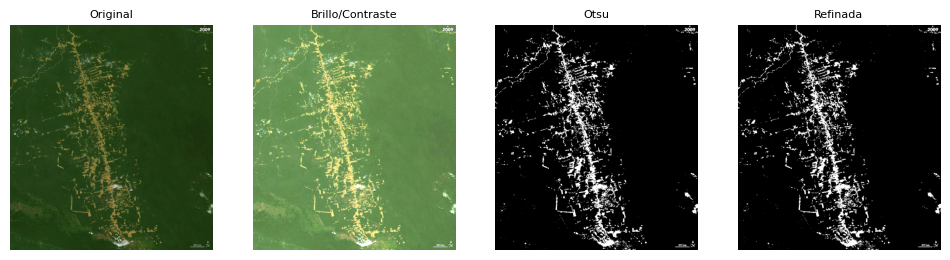

Imagen 9
Área segmentada: 41114 píxeles cuadrados
Área segmentada: 16123.13725490196 Km2
Umbral Otsu: 81.0


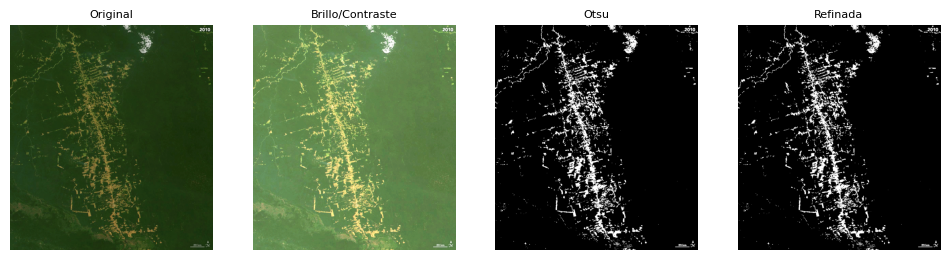

Imagen 10
Área segmentada: 40419 píxeles cuadrados
Área segmentada: 15850.588235294117 Km2
Umbral Otsu: 76.0


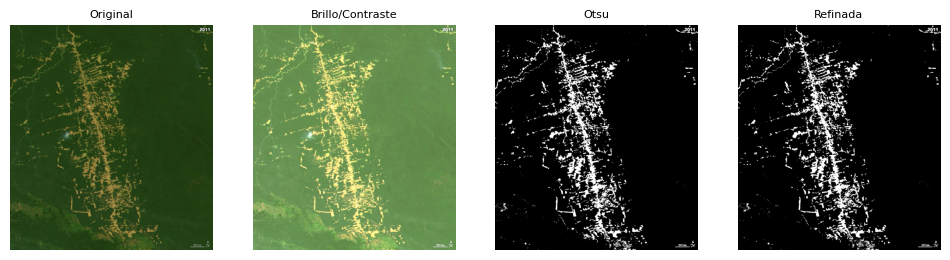

Imagen 11
Área segmentada: 45922 píxeles cuadrados
Área segmentada: 18008.62745098039 Km2
Umbral Otsu: 81.0


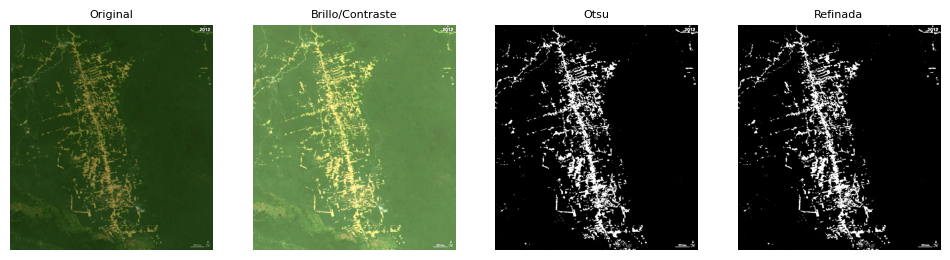

Imagen 12
Área segmentada: 45937 píxeles cuadrados
Área segmentada: 18014.50980392157 Km2
Umbral Otsu: 77.0


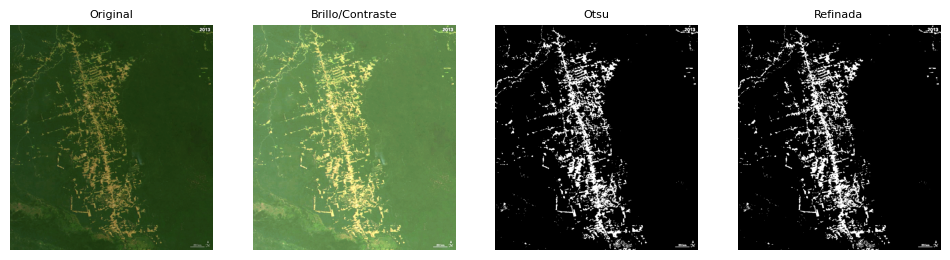

Imagen 13
Área segmentada: 47639 píxeles cuadrados
Área segmentada: 18681.960784313727 Km2
Umbral Otsu: 77.0


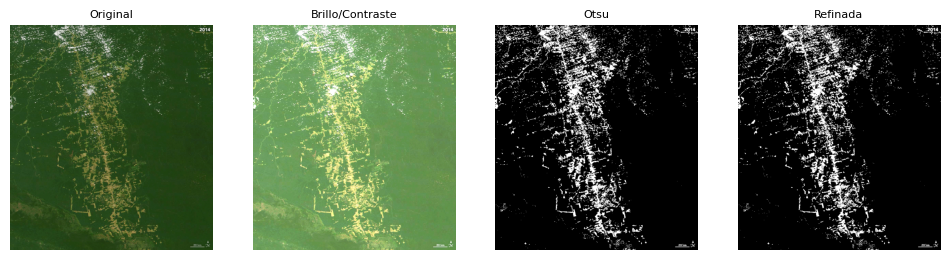

Imagen 14
Área segmentada: 58979 píxeles cuadrados
Área segmentada: 23129.01960784314 Km2
Umbral Otsu: 91.0


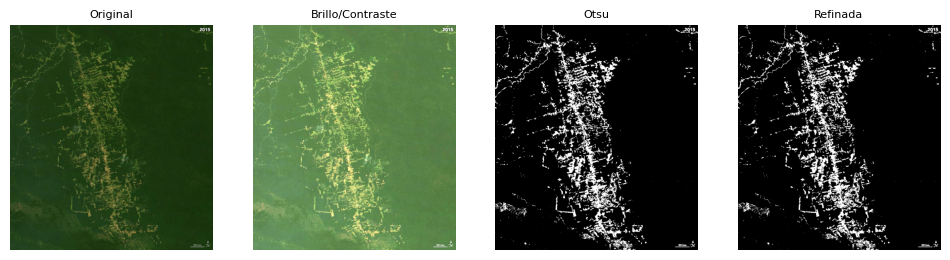

Imagen 15
Área segmentada: 51360 píxeles cuadrados
Área segmentada: 20141.176470588234 Km2
Umbral Otsu: 67.0


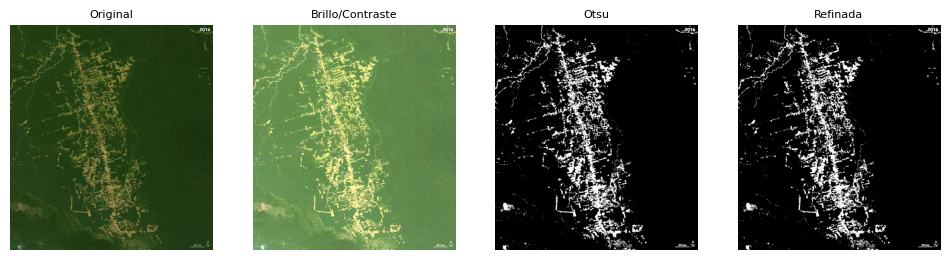

Imagen 16
Área segmentada: 54057 píxeles cuadrados
Área segmentada: 21198.823529411766 Km2
Umbral Otsu: 79.0


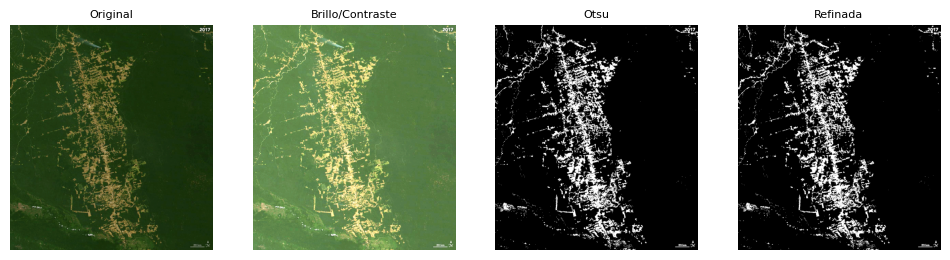

Imagen 17
Área segmentada: 59726 píxeles cuadrados
Área segmentada: 23421.960784313724 Km2
Umbral Otsu: 77.0


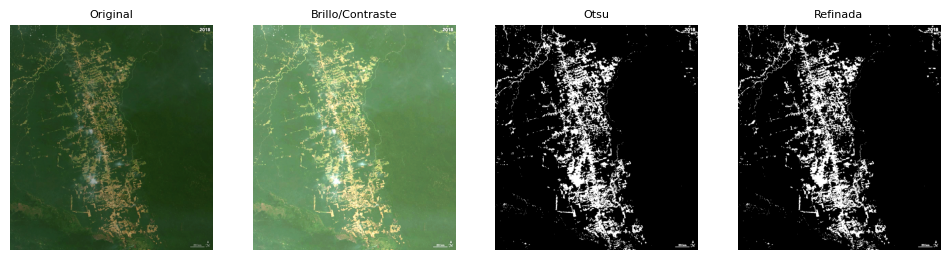

Imagen 18
Área segmentada: 64205 píxeles cuadrados
Área segmentada: 25178.43137254902 Km2
Umbral Otsu: 78.0


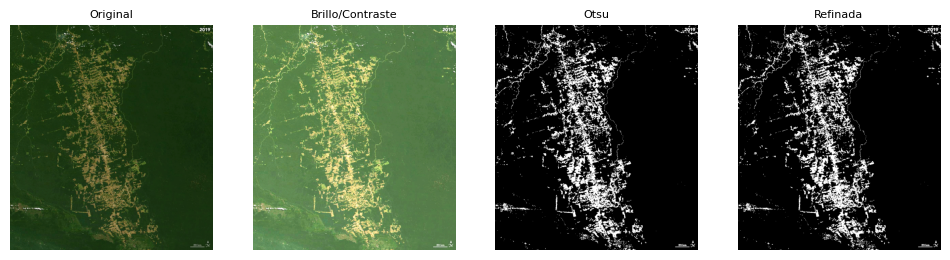

Imagen 19
Área segmentada: 61655 píxeles cuadrados
Área segmentada: 24178.43137254902 Km2
Umbral Otsu: 72.0


In [172]:
for i in range(20):
  area = procesar_imagen(imagenes[i], alpha, beta, kernel_size)
  print(f"Imagen {i}")
  print(f"Área segmentada: {area[0]} píxeles cuadrados")
  print(f"Área segmentada: {area[0]/51*20} Km2")
  print(f"Umbral Otsu: {area[1]}")